In [140]:
import pandas as pd
import seaborn as sns 

In [141]:
ss = pd.read_csv('../key_files/Leave_one_out_prediction/stabilizing_selection_era5/Genomic_offset_stabilizing_selection_loo_era5_prediction_summary.txt', sep='\t')

In [142]:
survival = pd.read_csv('../key_files/survival.csv')

In [143]:
survival.columns

Index(['site', 'plot', 'comments', '1_flowerstotal', '1_survival',
       '1_comments', '2_flowerstotal', '2_survival', '2_comments',
       '3_flowerstotal', '3_survival', '3_comments', '4_flowerstotal',
       '4_survival', '4_comments', '5_flowerstotal', '5_survival',
       '5_comments'],
      dtype='object')

In [144]:
survival2 = survival[['site', 'plot', 'comments','1_flowerstotal','2_flowerstotal',   '3_flowerstotal',  '4_flowerstotal',  '1_survival', '2_survival', '3_survival',  '4_survival']]

In [145]:
survival2['2_survival'].unique()

array([ 1.,  0., -1., nan])

In [146]:
## try keping only the 0 recorded flowers or x recorded flowers
# ignore the damage plots (-1) or the non info 
survival2 = survival2[survival2['2_survival'].isin([1.,  0])]

In [147]:
survival2['site'] = survival2['site'].astype(int)
survival2['plot'] = survival2['plot'].astype(int)

In [148]:
pop_size = pd.read_csv('../../grenenet_cleaning/grenenet/pop_size_estimations.csv')

In [149]:
# Pivot the DataFrame
pop_size = pop_size.pivot(index=['site', 'plot'], columns='generation', values='totalplantnumber_complete')

# Rename the columns to generation1, generation2, generation3
pop_size.columns = [f'pop_size_generation{col}' for col in pop_size.columns]

In [150]:
pop_size = pop_size.reset_index()

In [151]:
pop_size

,site,plot,pop_size_generation1,pop_size_generation2,pop_size_generation3,pop_size_generation4,pop_size_generation5,pop_size_generation6
0,1,1,396.000000,208.0,24.0,NaN,NaN,NaN
1,1,2,433.000000,194.0,0.0,NaN,NaN,NaN
2,1,3,323.000000,117.0,0.0,NaN,NaN,NaN
3,1,4,387.000000,235.0,20.0,NaN,NaN,NaN
4,1,5,289.000000,204.0,72.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
390,60,8,59.377180,NaN,NaN,NaN,NaN,NaN
391,60,9,54.310135,NaN,NaN,NaN,NaN,NaN
392,60,10,61.531473,NaN,NaN,NaN,NaN,NaN
393,60,11,62.693133,NaN,NaN,NaN,NaN,NaN


In [152]:
pop_size

,site,plot,pop_size_generation1,pop_size_generation2,pop_size_generation3,pop_size_generation4,pop_size_generation5,pop_size_generation6
0,1,1,396.000000,208.0,24.0,NaN,NaN,NaN
1,1,2,433.000000,194.0,0.0,NaN,NaN,NaN
2,1,3,323.000000,117.0,0.0,NaN,NaN,NaN
3,1,4,387.000000,235.0,20.0,NaN,NaN,NaN
4,1,5,289.000000,204.0,72.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
390,60,8,59.377180,NaN,NaN,NaN,NaN,NaN
391,60,9,54.310135,NaN,NaN,NaN,NaN,NaN
392,60,10,61.531473,NaN,NaN,NaN,NaN,NaN
393,60,11,62.693133,NaN,NaN,NaN,NaN,NaN


In [153]:
pop_size = pop_size[['site', 'plot', 'pop_size_generation1', 'pop_size_generation2', 'pop_size_generation3']]

In [154]:
pred_survival = ss.merge(survival2, on = ['site', 'plot'])

In [155]:
pred_survival = pred_survival.merge(pop_size)

In [156]:
climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')

climate = climate[['site', 'bio1']]

pred_survival = pred_survival.merge(climate, on = 'site')

Optimization terminated successfully.
         Current function value: 0.488852
         Iterations 6


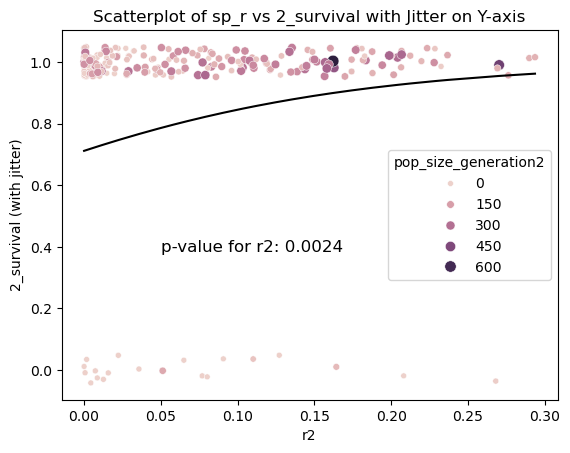

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pred_survival_subset = pred_survival[pred_survival['2_survival'].isin([1,0])]


# Add jitter to the '2_survival' column
jitter_amount = 0.05  # Adjust this value to control the amount of jitter
pred_survival_subset['2_survival_jittered'] = pred_survival_subset['2_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))

# Create a custom palette


# Plot with jitter on y-axis
sns.scatterplot(
    data=pred_survival_subset,
    x='r2',  # No jitter on x-axis
    y='2_survival_jittered',  # Use the jittered y values
    hue='pop_size_generation2',
    size = 'pop_size_generation2'  # Adjust point size if needed
)


# Prepare the data for logistic regression
X = pred_survival_subset['r2']  # Independent variable
X = sm.add_constant(X)      # Add a constant (intercept) to the model
y = pred_survival_subset['2_survival']  # Dependent variable

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate predicted probabilities
predicted_probabilities = result.predict(X)

# Sort the values for plotting
sorted_indices = np.argsort(pred_survival['r2'])
sorted_sp_r = pred_survival_subset['r2'].iloc[sorted_indices]
sorted_probs = predicted_probabilities.iloc[sorted_indices]

# Plot the logistic regression line
plt.plot(sorted_sp_r, sorted_probs, color='black')

# Extract p-value for the independent variable (sp_r)
p_value = result.pvalues['r2']  # p-value for the 'sp_r' variable

# Add p-value to the plot
plt.text(
    x=0.2, y=0.4,  # Position of the text (adjust as needed)
    s=f'p-value for r2: {p_value:.4f}',  # Format p-value to 4 decimal places
    fontsize=12, color='black',
    transform=plt.gca().transAxes  # Use axis coordinates for positioning
)



# Add labels and title
plt.xlabel('r2')
plt.ylabel('2_survival (with jitter)')
plt.title('Scatterplot of sp_r vs 2_survival with Jitter on Y-axis')

# Show the plot
plt.show()

/tmp/ipykernel_1670134/233142432.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_survival_subset['3_survival_jittered'] = pred_survival_subset['3_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))


Optimization terminated successfully.
         Current function value: 0.466054
         Iterations 6


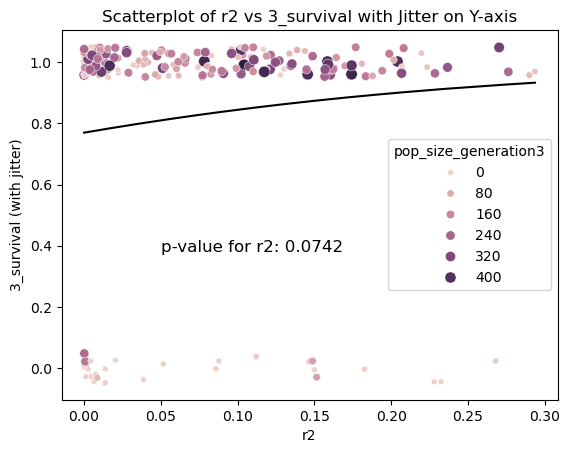

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pred_survival_subset = pred_survival[pred_survival['3_survival'].isin([1,0])]

# Add jitter to the '2_survival' column
jitter_amount = 0.05  # Adjust this value to control the amount of jitter
pred_survival_subset['3_survival_jittered'] = pred_survival_subset['3_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))

# Create a custom palette


# Plot with jitter on y-axis
sns.scatterplot(
    data=pred_survival_subset,
    x='r2',  # No jitter on x-axis
    y='3_survival_jittered',  # Use the jittered y values
    hue='pop_size_generation3',
    size = 'pop_size_generation3'  # Adjust point size if needed
)


# Prepare the data for logistic regression
X = pred_survival_subset['r2']  # Independent variable
X = sm.add_constant(X)      # Add a constant (intercept) to the model
y = pred_survival_subset['3_survival']  # Dependent variable

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate predicted probabilities
predicted_probabilities = result.predict(X)

# Sort the values for plotting
sorted_indices = np.argsort(pred_survival_subset['r2'])
sorted_r2 = pred_survival_subset['r2'].iloc[sorted_indices]
sorted_probs = predicted_probabilities.iloc[sorted_indices]

# Plot the logistic regression line
plt.plot(sorted_r2, sorted_probs, color='black')

# Extract p-value for the independent variable (sp_r)
p_value = result.pvalues['r2']  # p-value for the 'sp_r' variable

# Add p-value to the plot
plt.text(
    x=0.2, y=0.4,  # Position of the text (adjust as needed)
    s=f'p-value for r2: {p_value:.4f}',  # Format p-value to 4 decimal places
    fontsize=12, color='black',
    transform=plt.gca().transAxes  # Use axis coordinates for positioning
)



# Add labels and title
plt.xlabel('r2')
plt.ylabel('3_survival (with jitter)')
plt.title('Scatterplot of r2 vs 3_survival with Jitter on Y-axis')

# Show the plot
plt.show()

/tmp/ipykernel_1670134/2629476496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_survival_subset['4_survival_jittered'] = pred_survival_subset['4_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))


Optimization terminated successfully.
         Current function value: 0.539042
         Iterations 5


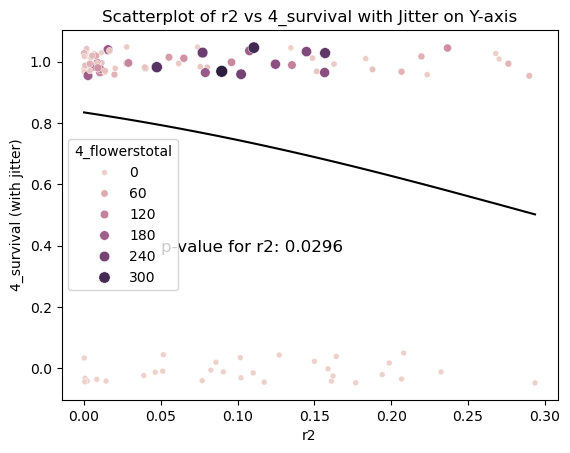

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pred_survival_subset = pred_survival[pred_survival['4_survival'].isin([1,0])]

# Add jitter to the '2_survival' column
jitter_amount = 0.05  # Adjust this value to control the amount of jitter
pred_survival_subset['4_survival_jittered'] = pred_survival_subset['4_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))

# Create a custom palette


# Plot with jitter on y-axis
sns.scatterplot(
    data=pred_survival_subset,
    x='r2',  # No jitter on x-axis
    y='4_survival_jittered',  # Use the jittered y values
    hue='4_flowerstotal',
    size = '4_flowerstotal'  # Adjust point size if needed
)


# Prepare the data for logistic regression
X = pred_survival_subset['r2']  # Independent variable
X = sm.add_constant(X)      # Add a constant (intercept) to the model
y = pred_survival_subset['4_survival']  # Dependent variable

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate predicted probabilities
predicted_probabilities = result.predict(X)

# Sort the values for plotting
sorted_indices = np.argsort(pred_survival_subset['r2'])
sorted_r2 = pred_survival_subset['r2'].iloc[sorted_indices]
sorted_probs = predicted_probabilities.iloc[sorted_indices]

# Plot the logistic regression line
plt.plot(sorted_r2, sorted_probs, color='black')

# Extract p-value for the independent variable (sp_r)
p_value = result.pvalues['r2']  # p-value for the 'sp_r' variable

# Add p-value to the plot
plt.text(
    x=0.2, y=0.4,  # Position of the text (adjust as needed)
    s=f'p-value for r2: {p_value:.4f}',  # Format p-value to 4 decimal places
    fontsize=12, color='black',
    transform=plt.gca().transAxes  # Use axis coordinates for positioning
)



# Add labels and title
plt.xlabel('r2')
plt.ylabel('4_survival (with jitter)')
plt.title('Scatterplot of r2 vs 4_survival with Jitter on Y-axis')

# Show the plot
plt.show()

Optimization terminated successfully.
         Current function value: 0.488852
         Iterations 6


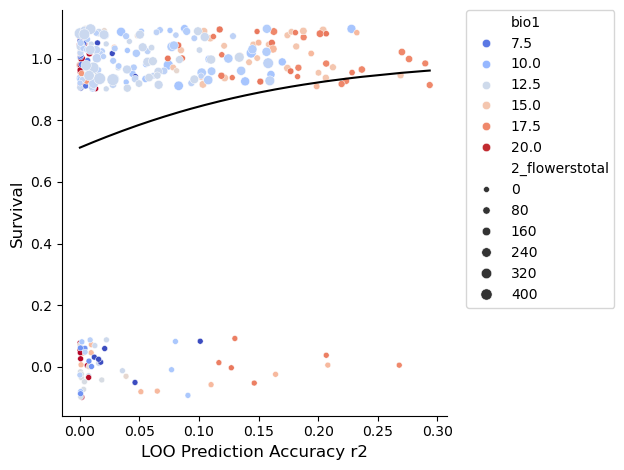

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  # Ensure statsmodels is imported



# Assuming pred_survival is already defined
pred_survival_subset = pred_survival[pred_survival['2_survival'].isin([1, 0])]

# Add jitter to the '4_survival' column
jitter_amount = 0.1  # Adjust this value to control the amount of jitter
pred_survival_subset['2_survival_jittered'] = pred_survival_subset['2_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))

# Plot with jitter on y-axis
sns.scatterplot(
    data=pred_survival_subset,
    x='r2',  # No jitter on x-axis
    y='2_survival_jittered',  # Use the jittered y values
    hue='bio1',
    palette='coolwarm',
    size='2_flowerstotal'  # Adjust point size if needed
)

# Prepare the data for logistic regression
X = pred_survival_subset['r2']  # Independent variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
y = pred_survival_subset['2_survival']  # Dependent variable

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate predicted probabilities
predicted_probabilities = result.predict(X)

# Sort the values for plotting
sorted_indices = np.argsort(pred_survival_subset['r2'])
sorted_r2 = pred_survival_subset['r2'].iloc[sorted_indices]
sorted_probs = predicted_probabilities.iloc[sorted_indices]

# Plot the logistic regression line
plt.plot(sorted_r2, sorted_probs, color='black')

# Extract p-value for the independent variable (r2)
p_value = result.pvalues['r2']  # p-value for the 'r2' variable

# Add p-value to the plot
#plt.text(
#    x=0.2, y=0.4,  # Position of the text (adjust as needed)
#    s=f'p-value for r2: {p_value:.4f}',  # Format p-value to 4 decimal places
#    fontsize=12, color='black',
#    transform=plt.gca().transAxes  # Use axis coordinates for positioning
#)

# Add labels and title

# Labels and formatting
plt.xlabel("LOO Prediction Accuracy r2", fontsize=12)
plt.ylabel("Survival", fontsize=12)
sns.despine(top=True, right=True)


# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

Optimization terminated successfully.
         Current function value: 0.488852
         Iterations 6


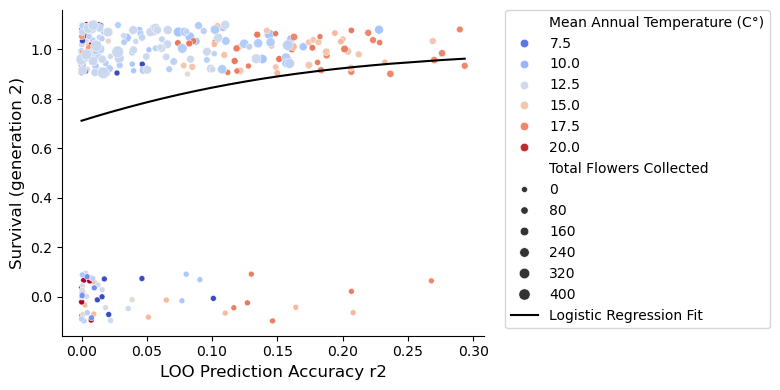

0.0023963202996829473


In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  # Ensure statsmodels is imported

# Assuming pred_survival is already defined
pred_survival_subset = pred_survival[pred_survival['2_survival'].isin([1, 0])]

# Add jitter to the '4_survival' column
jitter_amount = 0.1  # Adjust this value to control the amount of jitter
pred_survival_subset['2_survival_jittered'] = pred_survival_subset['2_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))

# Create a larger figure
plt.figure(figsize=(8, 4))  # Adjust width and height as needed

# Plot with jitter on y-axis
scatter = sns.scatterplot(
    data=pred_survival_subset,
    x='r2',  # No jitter on x-axis
    y='2_survival_jittered',  # Use the jittered y values
    hue='bio1',
    palette='coolwarm',
    size='2_flowerstotal'  # Adjust point size if needed
)

# Prepare the data for logistic regression
X = pred_survival_subset['r2']  # Independent variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
y = pred_survival_subset['2_survival']  # Dependent variable

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate predicted probabilities
predicted_probabilities = result.predict(X)

# Sort the values for plotting
sorted_indices = np.argsort(pred_survival_subset['r2'])
sorted_r2 = pred_survival_subset['r2'].iloc[sorted_indices]
sorted_probs = predicted_probabilities.iloc[sorted_indices]

# Plot the logistic regression line
plt.plot(sorted_r2, sorted_probs, color='black', label='Logistic Regression Fit')

# Extract p-value for the independent variable (r2)
p_value = result.pvalues['r2']  # p-value for the 'r2' variable

# Add p-value to the plot


# Labels and formatting
plt.xlabel("LOO Prediction Accuracy r2", fontsize=12)
plt.ylabel("Survival (generation 2)", fontsize=12)
sns.despine(top=True, right=True)

# Access the legend object
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Set individual titles for the legend entries
for text in legend.get_texts():
    if "bio1" in text.get_text():
        text.set_text(text.get_text().replace("bio1", "Mean Annual Temperature (C°)"))
    if "2_flowerstotal" in text.get_text():
        text.set_text(text.get_text().replace("2_flowerstotal", "Total Flowers Collected"))

# Adjust layout to make room for the legend
plt.tight_layout()

plt.savefig('survival_vs_loor2_colred_pop_size_and_temp.png')
plt.savefig('survival_vs_loor2_colred_pop_size_and_temp.pdf')

# Show the plot
plt.show()


print(result.pvalues['r2'])

Optimization terminated successfully.
         Current function value: 0.488852
         Iterations 6


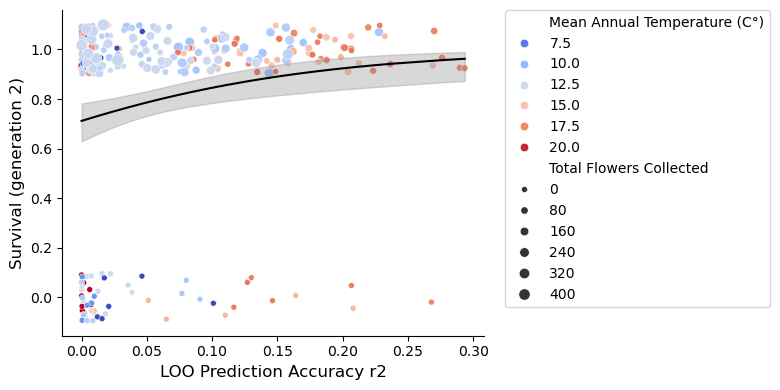

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  # Ensure statsmodels is imported

# Assuming pred_survival is already defined
pred_survival_subset = pred_survival[pred_survival['2_survival'].isin([1, 0])]

# Add jitter to the '4_survival' column
jitter_amount = 0.1  # Adjust this value to control the amount of jitter
pred_survival_subset['2_survival_jittered'] = pred_survival_subset['2_survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pred_survival_subset))

# Create a larger figure
plt.figure(figsize=(8, 4))  # Adjust width and height as needed

# Plot with jitter on y-axis
scatter = sns.scatterplot(
    data=pred_survival_subset,
    x='r2',  # No jitter on x-axis
    y='2_survival_jittered',  # Use the jittered y values
    hue='bio1',
    palette='coolwarm',
    size='2_flowerstotal'  # Adjust point size if needed
)

# Prepare the data for logistic regression
X = pred_survival_subset['r2']  # Independent variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
y = pred_survival_subset['2_survival']  # Dependent variable

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate predicted probabilities and confidence intervals
predicted_probabilities = result.predict(X)
conf_int = result.get_prediction(X).conf_int()  # Confidence intervals for predictions

# Sort the values for plotting
sorted_indices = np.argsort(pred_survival_subset['r2'])
sorted_r2 = pred_survival_subset['r2'].iloc[sorted_indices]
sorted_probs = predicted_probabilities.iloc[sorted_indices]
sorted_conf_int = conf_int[sorted_indices]  # Index the NumPy array directly

# Plot the logistic regression line
plt.plot(sorted_r2, sorted_probs, color='black')

# Add confidence interval shading
plt.fill_between(sorted_r2, sorted_conf_int[:, 0], sorted_conf_int[:, 1], color='gray', alpha=0.3)

# Extract p-value for the independent variable (r2)
p_value = result.pvalues['r2']  # p-value for the 'r2' variable

# Add p-value to the plot


# Labels and formatting
plt.xlabel("LOO Prediction Accuracy r2", fontsize=12)
plt.ylabel("Survival (generation 2)", fontsize=12)
sns.despine(top=True, right=True)

# Access the legend object
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Set individual titles for the legend entries
for text in legend.get_texts():
    if "bio1" in text.get_text():
        text.set_text(text.get_text().replace("bio1", "Mean Annual Temperature (C°)"))
    if "2_flowerstotal" in text.get_text():
        text.set_text(text.get_text().replace("2_flowerstotal", "Total Flowers Collected"))

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the plot
plt.savefig('survival_vs_loor2_colred_pop_size_and_temp.png')
plt.savefig('survival_vs_loor2_colred_pop_size_and_temp.pdf')

# Show the plot
plt.show()

/tmp/ipykernel_1670134/1487282286.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # P-value for the first predictor term


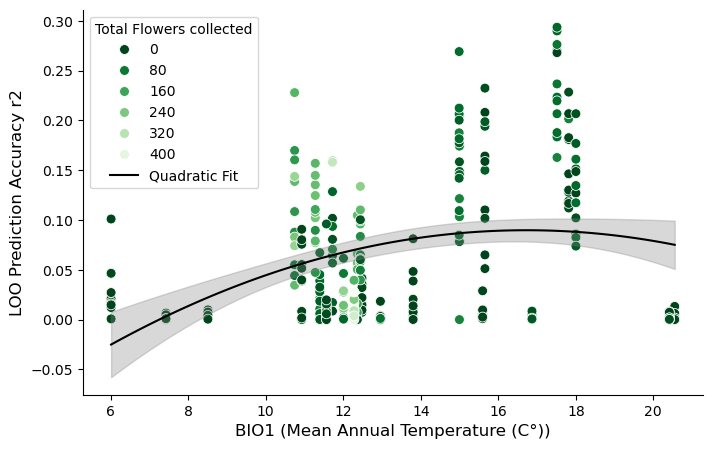

$R^2$ = 0.116  P = 9.32e-06


In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

# Assuming pred_survival is your DataFrame
x = pred_survival['bio1']
y = pred_survival['r2']

# Fit a polynomial regression (degree 2)
degree = 2
X_poly = np.column_stack([x**i for i in range(degree + 1)])  # Polynomial features
X_poly = sm.add_constant(X_poly)  # Add intercept

model = sm.OLS(y, X_poly).fit()  # Fit the model
r_squared = model.rsquared
p_value = model.pvalues[1]  # P-value for the first predictor term

# Generate predicted values for plotting the curve
x_range = np.linspace(x.min(), x.max(), 100)
X_poly_pred = np.column_stack([x_range**i for i in range(degree + 1)])
X_poly_pred = sm.add_constant(X_poly_pred)
y_pred = model.predict(X_poly_pred)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x = pred_survival['bio1'], y = pred_survival['r2'], hue = pred_survival['2_flowerstotal'], palette = 'Greens_r', s = 50, )  # Data points
plt.plot(x_range, y_pred, color="black", label="Quadratic Fit")  # Regression curve

# Confidence interval (approximate)
y_pred_err = model.get_prediction(X_poly_pred).conf_int()
plt.fill_between(x_range, y_pred_err[:, 0], y_pred_err[:, 1], color="gray", alpha=0.3)

# Add annotations for R² and P-value
#plt.text(x.max() + 0.1, y.max()-0.05, f"$R^2$ = {r_squared:.3f}  P = {p_value:.2e}", fontsize=12)

# Labels and formatting
plt.xlabel("BIO1 (Mean Annual Temperature (C°))", fontsize=12)
plt.ylabel("LOO Prediction Accuracy r2", fontsize=12)
plt.legend(title="Total Flowers collected")
sns.despine(top=True, right=True)

plt.grid(False)
#plt.ylim(-20, 550) 
plt.savefig('bio1_vs_loor2_colred_pop_size.png')
plt.savefig('bio1_vs_loor2_colred_pop_size.pdf')

plt.show()
print(f"$R^2$ = {r_squared:.3f}  P = {p_value:.2e}")

In [232]:
subset_pred_survival

,site,plot,pearson_r,sp_r,r2,source,comments,1_flowerstotal,2_flowerstotal,3_flowerstotal,4_flowerstotal,1_survival,2_survival,3_survival,4_survival,pop_size_generation1,pop_size_generation2,pop_size_generation3,bio1
0,1,1,0.185869,0.383413,0.034547,stabilizing_era5,NaN,146.0,208.0,24.0,NaN,1.0,1.0,1.0,NaN,396.0,208.000000,24.000000,10.743906
1,1,2,0.477383,0.648819,0.227895,stabilizing_era5,NaN,235.0,194.0,0.0,NaN,1.0,1.0,0.0,NaN,433.0,194.000000,0.000000,10.743906
2,1,3,0.296301,0.491111,0.087794,stabilizing_era5,NaN,229.0,117.0,0.0,NaN,1.0,1.0,0.0,NaN,323.0,117.000000,0.000000,10.743906
3,1,4,0.287874,0.553073,0.082871,stabilizing_era5,NaN,233.0,235.0,20.0,NaN,1.0,1.0,1.0,NaN,387.0,235.000000,20.000000,10.743906
4,1,5,0.372400,0.615124,0.138681,stabilizing_era5,NaN,226.0,204.0,72.0,NaN,1.0,1.0,1.0,NaN,289.0,204.000000,72.000000,10.743906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,57,12,0.166400,0.453354,0.027689,stabilizing_era5,NaN,143.0,458.0,46.0,8.0,1.0,1.0,1.0,1.0,109.0,114.240962,313.737474,12.276481
272,57,13,0.072465,0.431697,0.005251,stabilizing_era5,NaN,87.0,314.0,42.0,37.0,1.0,1.0,1.0,1.0,31.0,154.486184,319.895565,12.276481
273,57,15,0.094624,0.469415,0.008954,stabilizing_era5,NaN,285.0,324.0,6.0,94.0,1.0,1.0,1.0,1.0,216.0,195.880000,200.398010,12.276481
274,57,16,0.061128,0.446676,0.003737,stabilizing_era5,NaN,182.0,362.0,18.0,52.0,1.0,1.0,1.0,1.0,118.0,189.361986,245.235211,12.276481


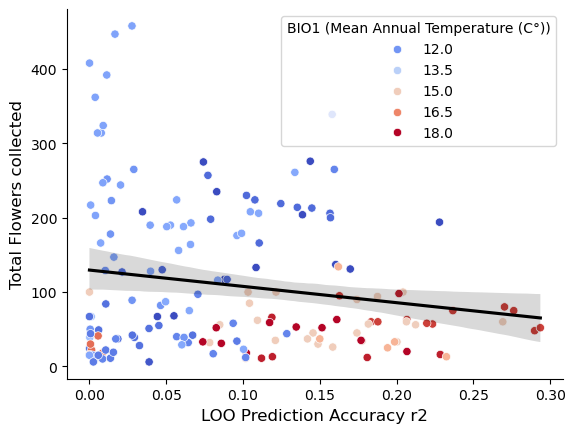

Model Summary:

P-value for r2: 0.0311
R-squared: 0.0284


In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Subset the data
subset_pred_survival = pred_survival[
    (pred_survival['bio1'] < 18.5) & 
    (pred_survival['bio1'] > 10) & 
    (pred_survival['2_flowerstotal'] > 5)
]

# Scatter plot
sns.scatterplot(
    x=subset_pred_survival['r2'], 
    y=subset_pred_survival['2_flowerstotal'], 
    hue=subset_pred_survival['bio1'], 
    palette='coolwarm'
)

# Regression plot
sns.regplot(
    x=subset_pred_survival['r2'], 
    y=subset_pred_survival['2_flowerstotal'], 
    scatter=False, 
    color='black'
)

# Prepare data for OLS regression
X = subset_pred_survival[['r2']]  # Independent variable
X = sm.add_constant(X)  # Add intercept
y = subset_pred_survival['2_flowerstotal']  # Dependent variable

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Plot the regression line (already done by sns.regplot)

# Labels and formatting
plt.xlabel("LOO Prediction Accuracy r2", fontsize=12)
plt.ylabel("Total Flowers collected", fontsize=12)
plt.legend(title="BIO1 (Mean Annual Temperature (C°))")
sns.despine(top=True, right=True)
plt.grid(False)

# Save the plot
plt.savefig('total_flowers_vs_loor2_colred_bio1.png')
plt.savefig('total_flowers_vs_loor2_colred_bio1.pdf')

# Show the plot
plt.show()

# Print p-value and R² after the plot
print("Model Summary:")

# Extract p-value and R²
p_value = model.pvalues['r2']  # p-value for the 'r2' variable
r_squared = model.rsquared  # R-squared value

print(f"\nP-value for r2: {p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")

<Axes: xlabel='bio1', ylabel='r2'>

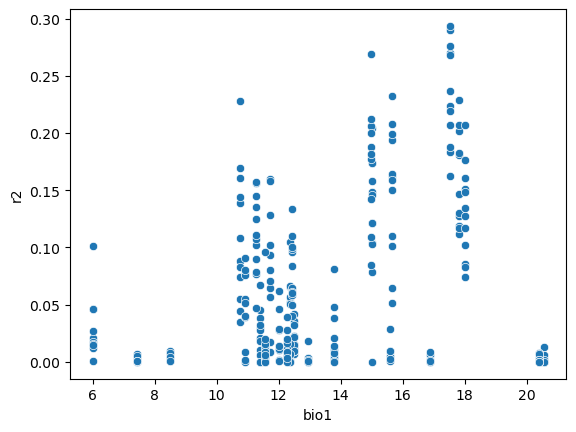

In [198]:
sns.scatterplot(data = pred_survival, x = 'bio1', y = 'r2')

<Axes: xlabel='r2', ylabel='pop_size_generation1'>

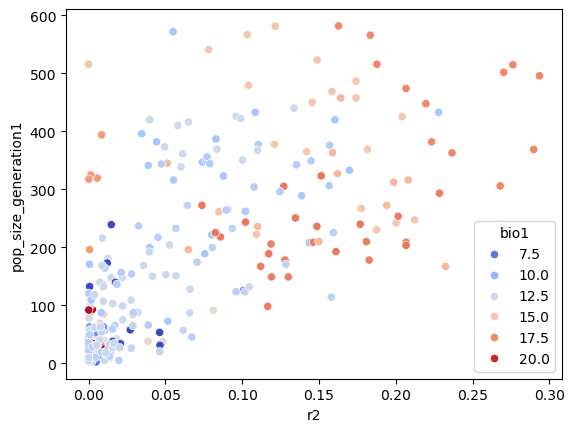

In [138]:
sns.scatterplot(x = pred_survival['r2'], y = pred_survival['pop_size_generation1'],  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points

<Axes: xlabel='r2', ylabel='pop_size_generation2'>

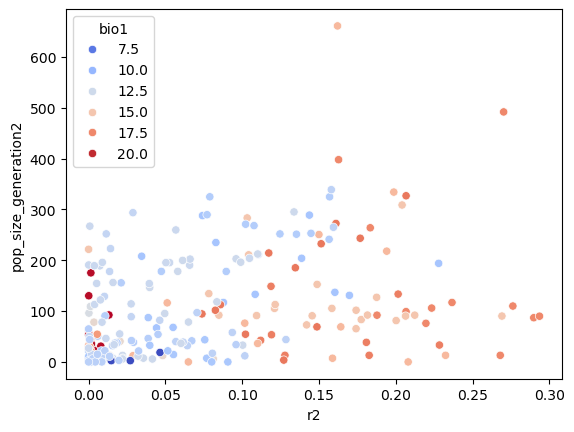

In [137]:
sns.scatterplot(x = pred_survival['r2'], y = pred_survival['pop_size_generation2'],  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points

<Axes: xlabel='r2', ylabel='3_flowerstotal'>

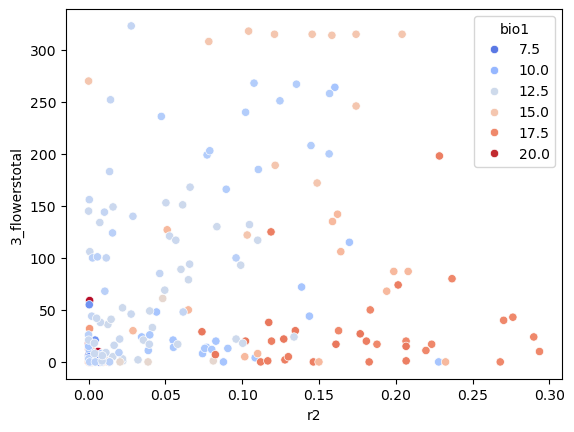

In [117]:
sns.scatterplot(x = pred_survival['r2'], y = pred_survival['3_flowerstotal'],  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points

<Axes: xlabel='r2', ylabel='1_flowerstotal'>

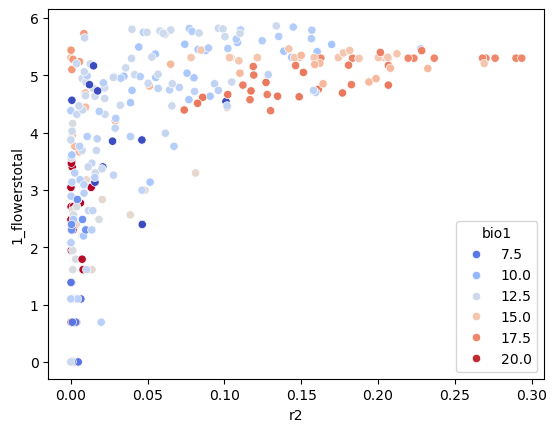

In [210]:
sns.scatterplot(x = pred_survival['r2'], y = np.log(pred_survival['1_flowerstotal']),  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='r2', ylabel='2_flowerstotal'>

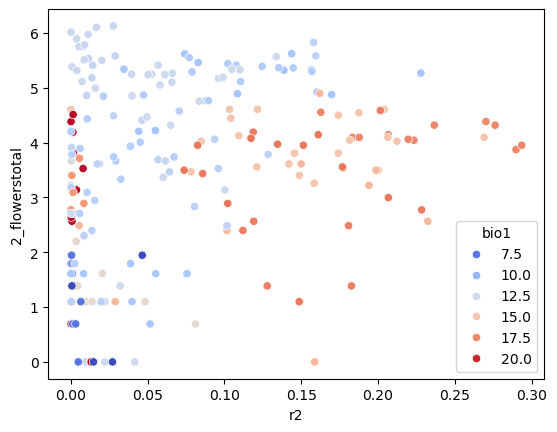

In [208]:
csns.scatterplot(x = pred_survival['r2'], y = np.log(pred_survival['2_flowerstotal']),  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points

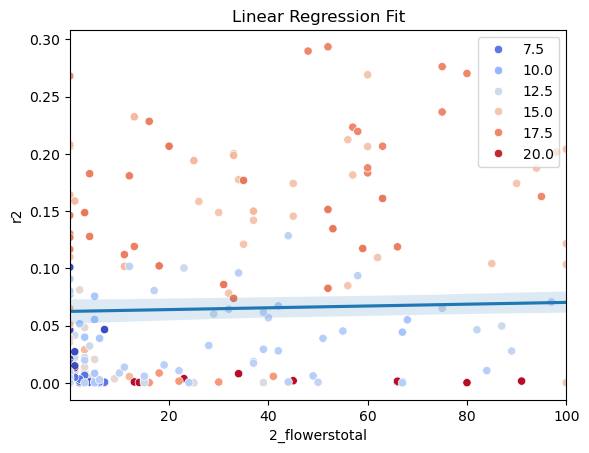

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
sns.scatterplot(x=pred_survival['2_flowerstotal'], y=pred_survival['r2'], hue=pred_survival['bio1'], palette='coolwarm')
sns.regplot(x=pred_survival['2_flowerstotal'], y=pred_survival['r2'],scatter=False)


X = pred_survival[['2_flowerstotal']]  # Include all predictors
y = pred_survival['r2']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()
# Predict values for the regression line

# Plot the regression line
# Add labels and legend
plt.xlabel('2_flowerstotal')
plt.ylabel('r2')
plt.legend()
plt.title('Linear Regression Fit')

plt.xlim(.10, 100) 
plt.show()

In [176]:
pred_survival_subset = pred_survival[pred_survival['2_flowerstotal']!=0]

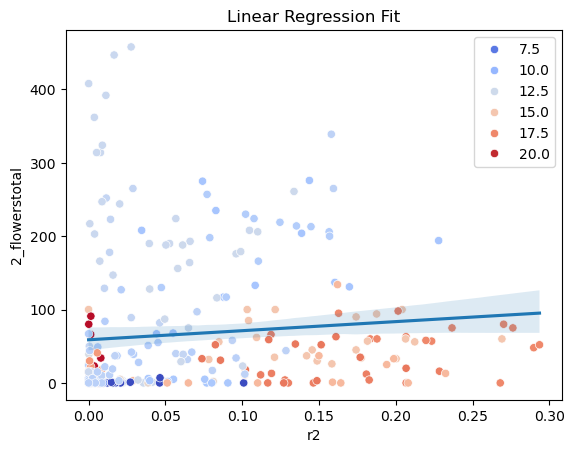

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
sns.scatterplot(x=pred_survival['r2'], y=pred_survival['2_flowerstotal'], hue=pred_survival['bio1'], palette='coolwarm')
sns.regplot(x=pred_survival['r2'], y=pred_survival['2_flowerstotal'],scatter=False)


X = pred_survival[['r2']]  # Include all predictors
y = pred_survival['2_flowerstotal']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()
# Predict values for the regression line

# Plot the regression line
# Add labels and legend
plt.xlabel('r2')
plt.ylabel('2_flowerstotal')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

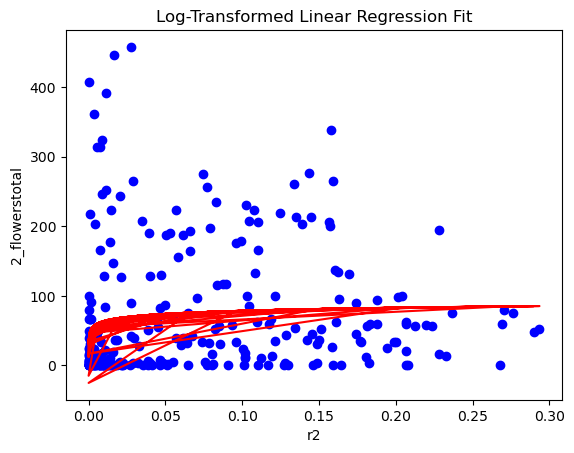

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Apply logarithmic transformation to x
X_log = np.log(pred_survival['r2'].values).reshape(-1, 1)  # Convert to NumPy array and reshape
y = pred_survival['2_flowerstotal']

# Fit the model
model = LinearRegression()
model.fit(X_log, y)

# Predict and plot
y_pred = model.predict(X_log)
plt.scatter(pred_survival['r2'], y, color='blue')
plt.plot(pred_survival['r2'], y_pred, color='red')
plt.xlabel('r2')
plt.ylabel('2_flowerstotal')
plt.title('Log-Transformed Linear Regression Fit')
plt.show()

Fitted parameters: a = 1.8320984428891645, b = -3.273897490221286


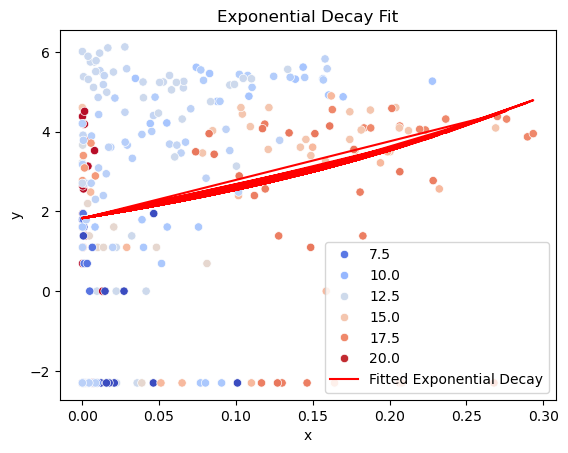

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit




x = pred_survival['r2']  # Include all predictors)
y = np.log(pred_survival['2_flowerstotal'].replace(0,0.1))

# Define the exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Fit the model
params, covariance = curve_fit(exponential_decay, x, y)

# Extract the fitted parameters
a_fit, b_fit = params
print(f"Fitted parameters: a = {a_fit}, b = {b_fit}")

# Generate fitted values
y_fit = exponential_decay(x, a_fit, b_fit)

# Plot the original data and the fitted curve
sns.scatterplot(x = x, y = y,  hue=pred_survival['bio1'], palette='coolwarm')
plt.plot(x, y_fit, label='Fitted Exponential Decay', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Exponential Decay Fit')
plt.show()

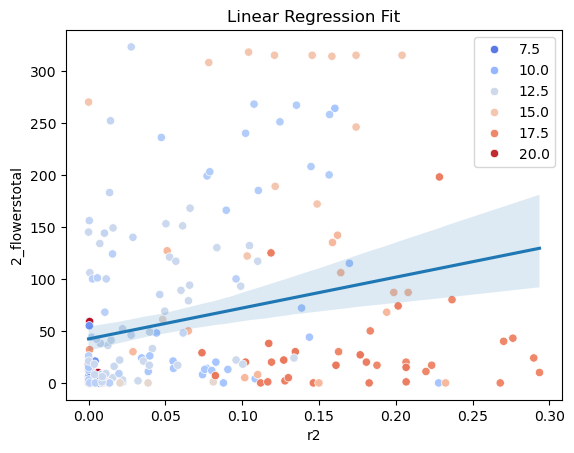

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
sns.scatterplot(x=pred_survival['r2'], y=pred_survival['3_flowerstotal'], hue=pred_survival['bio1'], palette='coolwarm')
sns.regplot(x=pred_survival['r2'], y=pred_survival['3_flowerstotal'],scatter=False)


X = pred_survival[['r2']]  # Include all predictors
y = pred_survival['3_flowerstotal']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()
# Predict values for the regression line

# Plot the regression line
# Add labels and legend
plt.xlabel('r2')
plt.ylabel('2_flowerstotal')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

/tmp/ipykernel_1670134/3354139750.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # P-value for the first predictor term


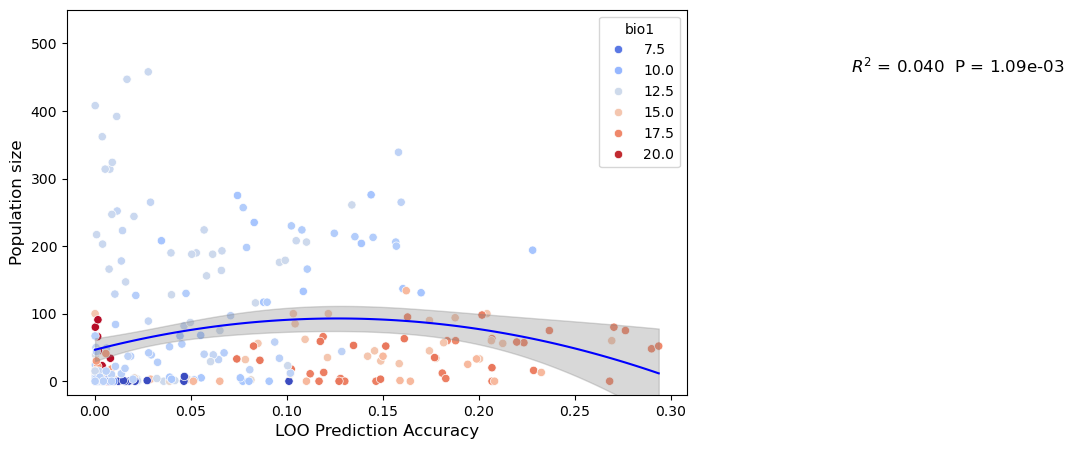

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

# Assuming pred_survival is your DataFrame
x = pred_survival['r2']
y = pred_survival['2_flowerstotal']

# Fit a polynomial regression (degree 2)
degree = 2
X_poly = np.column_stack([x**i for i in range(degree + 1)])  # Polynomial features
X_poly = sm.add_constant(X_poly)  # Add intercept

model = sm.OLS(y, X_poly).fit()  # Fit the model
r_squared = model.rsquared
p_value = model.pvalues[1]  # P-value for the first predictor term

# Generate predicted values for plotting the curve
x_range = np.linspace(x.min(), x.max(), 100)
X_poly_pred = np.column_stack([x_range**i for i in range(degree + 1)])
X_poly_pred = sm.add_constant(X_poly_pred)
y_pred = model.predict(X_poly_pred)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x = pred_survival['r2'], y = pred_survival['2_flowerstotal'],  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points
plt.plot(x_range, y_pred, color="blue", label="Quadratic Fit")  # Regression curve

# Confidence interval (approximate)
y_pred_err = model.get_prediction(X_poly_pred).conf_int()
plt.fill_between(x_range, y_pred_err[:, 0], y_pred_err[:, 1], color="gray", alpha=0.3)

# Add annotations for R² and P-value
plt.text(x.max() + 0.1, y.max()-0.05, f"$R^2$ = {r_squared:.3f}  P = {p_value:.2e}", fontsize=12)

# Labels and formatting
plt.xlabel("LOO Prediction Accuracy", fontsize=12)
plt.ylabel("Population size", fontsize=12)

plt.grid(False)
plt.ylim(-20, 550) 
plt.show()


/tmp/ipykernel_1670134/2099617160.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # P-value for the first predictor term


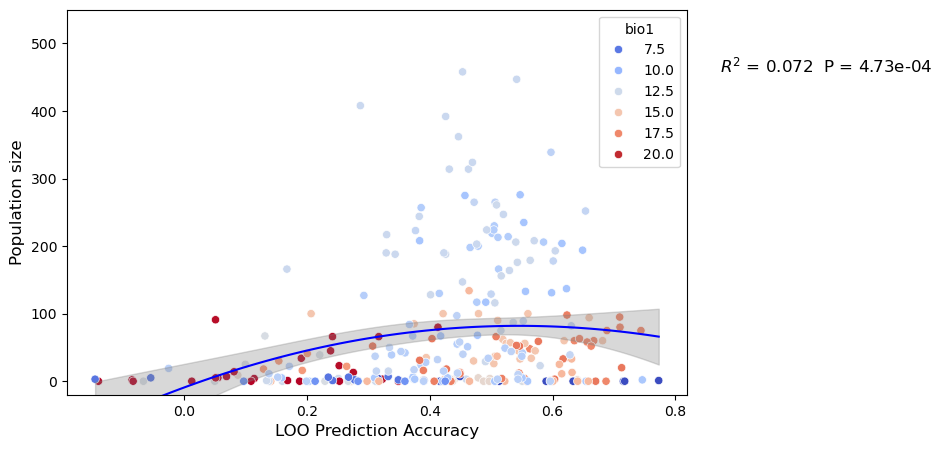

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

# Assuming pred_survival is your DataFrame
x = pred_survival['sp_r']
y = pred_survival['2_flowerstotal']

# Fit a polynomial regression (degree 2)
degree = 2
X_poly = np.column_stack([x**i for i in range(degree + 1)])  # Polynomial features
X_poly = sm.add_constant(X_poly)  # Add intercept

model = sm.OLS(y, X_poly).fit()  # Fit the model
r_squared = model.rsquared
p_value = model.pvalues[1]  # P-value for the first predictor term

# Generate predicted values for plotting the curve
x_range = np.linspace(x.min(), x.max(), 100)
X_poly_pred = np.column_stack([x_range**i for i in range(degree + 1)])
X_poly_pred = sm.add_constant(X_poly_pred)
y_pred = model.predict(X_poly_pred)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x = pred_survival['sp_r'], y = pred_survival['2_flowerstotal'],  hue = pred_survival['bio1'], palette = 'coolwarm')  # Data points
plt.plot(x_range, y_pred, color="blue", label="Quadratic Fit")  # Regression curve

# Confidence interval (approximate)
y_pred_err = model.get_prediction(X_poly_pred).conf_int()
plt.fill_between(x_range, y_pred_err[:, 0], y_pred_err[:, 1], color="gray", alpha=0.3)

# Add annotations for R² and P-value
plt.text(x.max() + 0.1, y.max()-0.05, f"$R^2$ = {r_squared:.3f}  P = {p_value:.2e}", fontsize=12)

# Labels and formatting
plt.xlabel("LOO Prediction Accuracy", fontsize=12)
plt.ylabel("Population size", fontsize=12)

plt.grid(False)
plt.ylim(-20, 550) 
plt.show()


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

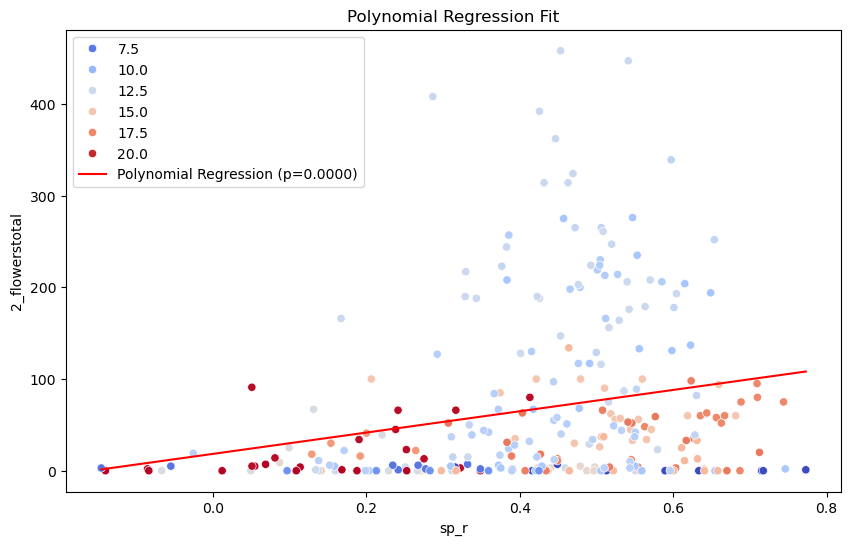

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Define the polynomial function (e.g., quadratic)
def polynomial_func(x, a, b, c):
    return a * x**2 + b * x + c

# Assuming pred_survival is your DataFrame
# Replace this with your actual data

# Prepare your data
X = pred_survival['sp_r'].values
y = pred_survival['2_flowerstotal'].values

# Fit the polynomial regression with constraints
initial_guess = [1, 1, 1]  # Initial guess for parameters
params, _ = curve_fit(polynomial_func, X, y, p0=initial_guess, bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))

# Generate predictions for the regression line
X_fit = np.linspace(X.min(), X.max(), 100)
y_fit = polynomial_func(X_fit, *params)

# Calculate residuals and p-value
residuals = y - polynomial_func(X, *params)
chi2, p_value = stats.chisquare(f_obs=y, f_exp=polynomial_func(X, *params))

# Plot the scatter plot with the polynomial regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pred_survival,
    x='sp_r',
    y='2_flowerstotal',
    hue='bio1',
    palette='coolwarm',
)
plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Regression (p={p_value:.4f})')
plt.legend()
plt.xlabel('sp_r')
plt.ylabel('2_flowerstotal')
plt.title('Polynomial Regression Fit')
plt.show()

In [36]:
p_value

0.0

<Axes: xlabel='sp_r', ylabel='3_flowerstotal'>

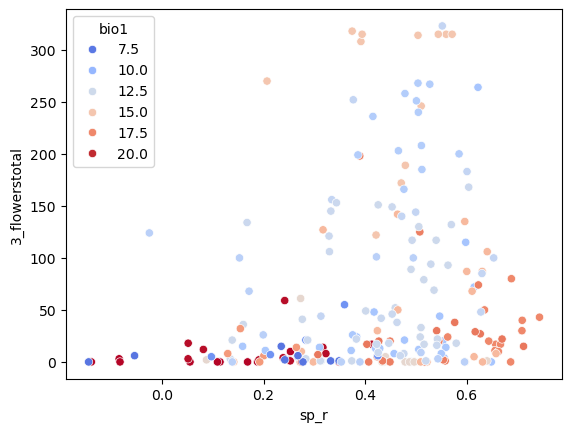

In [124]:
sns.scatterplot(
    data=pred_survival,
    x='sp_r',  # No jitter on x-axis
    y='3_flowerstotal',  # Use the jittered y values
    hue='bio1',
    palette = 'coolwarm',)

<Axes: xlabel='sp_r', ylabel='4_flowerstotal'>

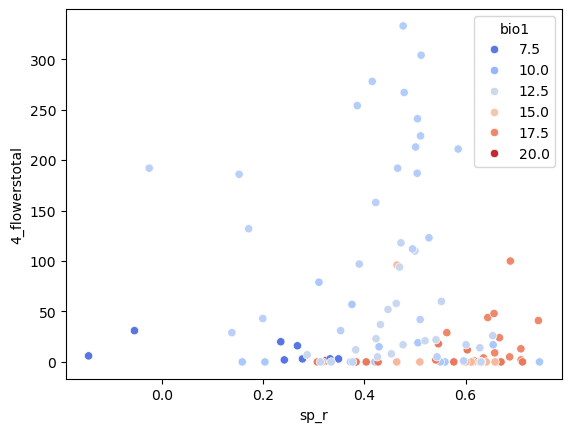

In [125]:
sns.scatterplot(
    data=pred_survival,
    x='sp_r',  # No jitter on x-axis
    y='4_flowerstotal',  # Use the jittered y values
    hue='bio1',
    palette = 'coolwarm',)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a custom palette
# Define black for 0 and a color gradient for values > 0
unique_flower_values = pred_survival['1_flowerstotal'].unique()
max_flower = pred_survival['1_flowerstotal'].max()

In [66]:
unique_flower_values

array([146., 235., 229., 233., 226., 203., 254., 255., 215., 263., 224.,
       243.,  67.,  39., 109.,  85.,  52.,  43., 200., 202., 182., 191.,
       199., 230., 216., 219., 140., 150.,  99., 181., 103., 132., 118.,
        75., 119., 169., 104.,  88.,  15.,  30.,   1.,   7.,  21.,  12.,
        33.,  32.,  16.,  20.,  17.,  24.,  13.,  27.,  11.,  14.,   9.,
        10.,   5.,   3.,   6.,   4.,  35.,  49.,  64.,   8.,   2., 126.,
       113.,  94.,  23.,  47.,  48.,  96., 175.,  51.,  70., 130.,  80.,
        18., 145.,  79., 141., 188., 307., 196., 164., 221., 228., 173.,
       177., 176., 149., 125., 106.,  97.,  92.,  37., 143., 114., 154.,
       142., 156., 131., 102., 116., 101.,  91.,  81., 183., 128., 210.,
       123., 179., 167., 180., 168., 237., 271., 279., 292., 336., 344.,
       281., 327., 326., 319., 314., 239.,  87.,  22., 115., 120., 110.,
       112.,  26.,  54.,  59.,  56., 204., 151.,  40., 129., 337., 331.,
       321., 351., 333., 291., 302., 310., 308., 30

In [69]:
unique_flower_values[unique_flower_values == 0]

array([], dtype=float64)

In [64]:


# Create a gradient palette for values > 0
gradient_palette = sns.color_palette("viridis", n_colors=len(unique_flower_values) - 1)

# Combine black for 0 and the gradient for > 0
custom_palette = {0: 'black'}  # Black for 0
for i, value in enumerate(sorted(unique_flower_values[unique_flower_values > 0])):
    custom_palette[value] = gradient_palette[i]

# Plot
sns.scatterplot(
    data=pred_survival,
    x='sp_r',
    y='2_survival',
    hue='1_flowerstotal',
    palette=custom_palette,
    s=100  # Adjust point size if needed
)

# Add labels and title
plt.xlabel('sp_r')
plt.ylabel('2_survival')
plt.title('Scatterplot of sp_r vs 2_survival')

# Show the plot
plt.legend(title='1_flowerstotal', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()

IndexError: list index out of range